## Library Installation

###  Libraries importing

In [0]:

import DadosIO as Db
import Function as ut_f
from datetime import datetime

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import mlflow
import mlflow.keras

from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.types import *
from pyspark.sql.window import Window
from pyspark.sql.functions import col


### Load table 

In [0]:
now = datetime.now()

#date = now.strftime("%Y%m%d")
date = 20241118
spark = SparkSession.builder.appName("LSTMStockPredictor").getOrCreate()

df = spark.table('sandbox.silver_acoes_disney').filter(f.col('dt_carga') == date)



In [0]:
df = spark.table('sandbox.silver_acoes_disney')
display(df)

adj_cluster,close,High,low,open,volume,dt_carga
96.75,96.75,96.79,93.63,93.73,9936300,20241127
94.15,94.15,94.58,93.59,93.59,6144200,20241127
100.40678,100.87,102.88,100.74,102.64,9134200,20241127
101.372314,101.84,101.94,100.38,100.57,7886900,20241127
88.79,88.79,88.93,87.21,87.25,12401000,20241127
120.97189,121.53,122.4,120.78,122.06,8419700,20241127
85.95,85.95,86.38,85.48,85.86,11754600,20241127
95.15,95.15,95.34,93.89,94.3,6308900,20241127
89.92,89.92,91.38,89.7,90.99,7613000,20241127
97.589775,98.04,99.74,97.88,99.4,15299000,20241127


### Model Initialization

In [0]:
pandas_df = df.select('close').toPandas()

df = spark.createDataFrame(pandas_df)

first_row = df.first()

if isinstance(first_row['close'], str):
    df = df.filter(df.close != first_row["close"])

df.show(3)

+------+
| close|
+------+
| 96.75|
| 94.15|
|100.87|
+------+
only showing top 3 rows



### Preprocess

In [0]:
closing_prices = df.select(col("close")).rdd.flatMap(lambda x: x).collect()

# Filtra qualquer elemento None ou NaN
closing_prices = [price for price in closing_prices if price is not None and not np.isnan(price)]

# Redimensiona a list para ser compatível com a operação de dimensionamento a seguir
closing_prices = np.array(closing_prices).reshape(-1, 1)

# Normaliza the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Cria as sequencias para treinamento
sequence_length = 60
X_train, y_train = [], []

for i in range(sequence_length, len(scaled_data)):
    X_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



### Build the LSTM model

Epoch 1/5
20/20 [==============================] - 3s 29ms/step - loss: 0.0952
Epoch 2/5
20/20 [==============================] - 1s 29ms/step - loss: 0.0748
Epoch 3/5
20/20 [==============================] - 1s 28ms/step - loss: 0.0714
Epoch 4/5
20/20 [==============================] - 1s 29ms/step - loss: 0.0704
Epoch 5/5
20/20 [==============================] - 1s 29ms/step - loss: 0.0693


2024/11/28 00:23:28 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
Registered model 'Registered_LSTM_Model' already exists. Creating a new version of this model...
2024/11/28 00:23:40 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Registered_LSTM_Model, version 8
Created version '8' of model 'Registered_LSTM_Model'.


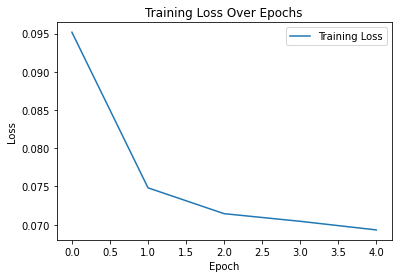

In [0]:

# Build do modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  

model.compile(optimizer='adam', loss='mean_squared_error')

experiment_params = {
    "sequence_length": sequence_length,
    "units": 50,
    "dropout_rate": 0.2,
    "epochs": 5,
    "batch_size": 32
}

with mlflow.start_run() as run:
    for param, value in experiment_params.items():
        mlflow.log_param(param, value)

    history = model.fit(X_train, y_train, epochs=experiment_params["epochs"], batch_size=experiment_params["batch_size"])

    final_loss = history.history["loss"][-1]
    mlflow.log_metric("final_training_loss", final_loss)

    plt.plot(history.history["loss"], label="Training Loss")
    plt.title("Training Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig("training_loss_plot.png")
    mlflow.log_artifact("training_loss_plot.png", "training_loss_plot")

    # Loga e registra o modelo
    model_name = "Registered_LSTM_Model"
    mlflow.keras.log_model(model, "lstm_model", registered_model_name=model_name)


### Obtaining evaluation criterias

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

#Split the last 20% of data as a test set
split = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:split], scaled_data[split:]

# Create test sequences
X_test, y_test = [], []
for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform to get predictions back to original price scale
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the metrics
mae = mean_absolute_error(y_test_actual, predicted_prices)
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_prices))
mape = mean_absolute_percentage_error(y_test_actual, predicted_prices)

# Log metrics in MLflow
with mlflow.start_run():
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAPE", mape)

    print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape}")

3/3 [==============================] - 1s 9ms/step
MAE: 8.057094332538073, RMSE: 9.77725420065957, MAPE: 0.07914149167718293


### Publish Model Endpoint Serving

In [0]:
token = dbutils.notebook.entry_point.getDbutils().notebook().getContext().apiToken().getOrElse(None)
 
# Obtem o token e cria o cabeçalho
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
  }
 
# Obtem um endpoint para executar a solicitação, que pode ser obtido na coleção de tags do notebook
java_tags = dbutils.notebook.entry_point.getDbutils().notebook().getContext().tags()
 
tags = sc._jvm.scala.collection.JavaConversions.mapAsJavaMap(java_tags)
 
# Extraindo a instância do Databricks do dicionário
instance = tags["browserHostName"]
 
from mlflow.tracking.client import MlflowClient
def get_latest_model_version(model_name: str):
  client = MlflowClient()
  models = client.get_latest_versions(model_name, stages=["None"])
  for m in models:
    new_model_version = m.version
  return new_model_version

#### Configs cluster endpoint

In [0]:
model_name = 'Registered_LSTM_Model'
model_serving_endpoint_name ='lstm_model_endpoint'

In [0]:
import requests
 
my_json = {
  "name": model_serving_endpoint_name,
  "config": {
   "served_models": [{
     "model_name": model_name,
     "model_version": get_latest_model_version(model_name=model_name),
     "workload_size": "Small",
     "scale_to_zero_enabled": True
   }]
 }
}

#### Create a endpoint model

In [0]:
def func_create_endpoint(model_serving_endpoint_name):

  #Obtem o status do endpoint
  endpoint_url = f"https://{instance}/api/2.0/serving-endpoints"
  url = f"{endpoint_url}/{model_serving_endpoint_name}"
  print(endpoint_url)
  r = requests.get(url, headers=headers)

  if "RESOURCE_DOES_NOT_EXIST" in r.text:  
    print("Creating this new endpoint: ", f"https://{instance}/serving-endpoints/{model_serving_endpoint_name}/invocations")
    re = requests.post(endpoint_url, headers=headers, json=my_json)
  else:
    new_model_version = (my_json['config'])['served_models'][0]['model_version']
    print("This endpoint existed previously! We are updating it to a new config with new model version: ", new_model_version)
    
    # Atualiza as configs
    url = f"{endpoint_url}/{model_serving_endpoint_name}/config"
    re = requests.put(url, headers=headers, json=my_json['config']) 

    import time,json
    url = f"https://{instance}/api/2.0/serving-endpoints/{model_serving_endpoint_name}"
    retry = True
    total_wait = 0

    while retry:
      r = requests.get(url, headers=headers)
      assert r.status_code == 200, f"Expected an HTTP 200 response when accessing endpoint info, received {r.status_code}"
      endpoint = json.loads(r.text)
      if "pending_config" in endpoint.keys():

        seconds = 10
        print("New config still pending")
        if total_wait < 6000:

          print(f"Wait for {seconds} seconds")
          print(f"Total waiting time so far: {total_wait} seconds")
          time.sleep(10)
          total_wait += seconds
        else:
          print(f"Stopping,  waited for {total_wait} seconds")
          retry = False  
      else:
        print("New config in place now!")
        retry = False
        
  assert re.status_code == 200, f"Expected an HTTP 200 response, received {re.status_code}"

func_create_endpoint(model_serving_endpoint_name)
  

https://adb-4529457206932797.17.azuredatabricks.net/api/2.0/serving-endpoints
Creating this new endpoint:  https://adb-4529457206932797.17.azuredatabricks.net/serving-endpoints/lstm_model_endpoint/invocations


#### Check endpooint status

In [0]:
#GET /api/2.0/serving-endpoints/{name}
 
import time, mlflow
 
def wait_for_endpoint():
    endpoint_url = f"https://{instance}/api/2.0/serving-endpoints"
    print(endpoint_url)
    while True:
        url =  f"{endpoint_url}/{model_serving_endpoint_name}"
        print(url)
        response = requests.get(url, headers=headers)
        assert response.status_code == 200, f"Expected an HTTP 200 response, received {response.status_code}\n{response.text}"
 
        status = response.json().get("state", {}).get("ready", {})
        #print("status",status)
        if status == "READY": print(status); print("-"*80); return
        else: print(f"Endpoint not ready ({status}), waiting 10 seconds"); time.sleep(10) # Wait 10 seconds
        
api_url = mlflow.utils.databricks_utils.get_webapp_url()
print(api_url)
 
wait_for_endpoint()
time.sleep(5)

https://eastus2-c2.azuredatabricks.net
https://adb-4529457206932797.17.azuredatabricks.net/api/2.0/serving-endpoints
https://adb-4529457206932797.17.azuredatabricks.net/api/2.0/serving-endpoints/lstm_model_endpoint
Endpoint not ready (NOT_READY), waiting 10 seconds
https://adb-4529457206932797.17.azuredatabricks.net/api/2.0/serving-endpoints/lstm_model_endpoint
Endpoint not ready (NOT_READY), waiting 10 seconds
https://adb-4529457206932797.17.azuredatabricks.net/api/2.0/serving-endpoints/lstm_model_endpoint
Endpoint not ready (NOT_READY), waiting 10 seconds
https://adb-4529457206932797.17.azuredatabricks.net/api/2.0/serving-endpoints/lstm_model_endpoint
Endpoint not ready (NOT_READY), waiting 10 seconds
https://adb-4529457206932797.17.azuredatabricks.net/api/2.0/serving-endpoints/lstm_model_endpoint
Endpoint not ready (NOT_READY), waiting 10 seconds
https://adb-4529457206932797.17.azuredatabricks.net/api/2.0/serving-endpoints/lstm_model_endpoint
Endpoint not ready (NOT_READY), waiting 